# Conditional Response: Evolution Through Programming Course, Week 7
## By Sarit Moses and Itamar Nini

In [140]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import math

In [119]:
# define functions to
# calculate fitness of a mixed population
# note - there is a difference between the published assignment and the map in the equation to be calculated
# (equation 13 in the paper)
# we decided to go with the version of the paper

def calc_fitness_diff(f, p, eta, kappa, Ts1, alpha, delta_t):
    """
    Calculates the avrage fitness advantage for having frequency of f conditional responders.
    Args:
        f: frequency of conditional responders.
        p: probability of S2 follows S1
        eta: cost parameter
        kappa: benefit coefficient
        Ts1: duration of S1 exposure
        alpha: degredation rate
        delta_t: delay between S1 and S2
    """
    benefit = p * (((1 - eta) * kappa * (1 - math.exp(-alpha * delta_t)) / alpha) - (eta * delta_t))
    print((eta * Ts1))
    cost = (1 - p) * (eta * Ts1)
    delta_f_cr_minus_dr = benefit - cost
    delta_F_mixed = np.array(f) * np.array(delta_f_cr_minus_dr)
    return delta_F_mixed

In [120]:
# create grids for p and f:

p_values = np.linspace(0, 1, 100) # 100 points between 0 and 1
f_values = np.linspace(0, 1, 100) # 100 points between 0 and 1

P, F = np.meshgrid(p_values, f_values)

#### Low cost and high benefit:

In [121]:
# define model parameters (taken from the paper):

delta_t = 3  # Delay between S1 and S2 in hours. The model used it to simulate something passing through the digestive track
eta = 0.1   # Cost parameter
alpha = np.log(2) # Dilution/degradation rate (ln(2))
kappa = 0.9   # Benefit coefficient
Ts1 = 1

# eta, kappa and Ts1 exact values were not mentioned in the paper. I chose arbitraty values.

0.1


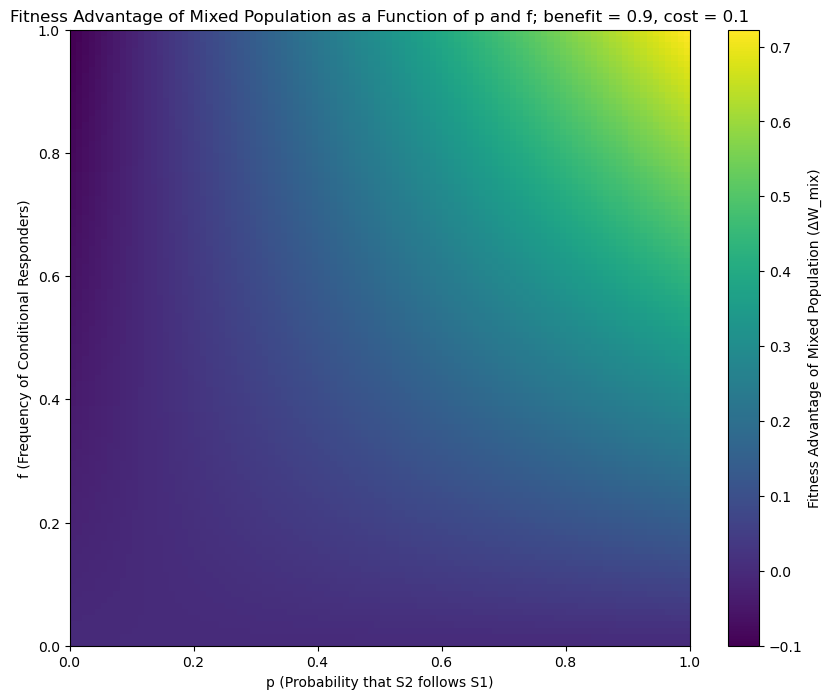

In [122]:
# run the average fitness advantage function and create heatmap:

heatmap_data = calc_fitness_diff(F, P, eta, kappa, Ts1, alpha, delta_t)
low_cost_high_benefit = heatmap_data
# Create the 2D Heatmap
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, origin='lower', extent=[0, 1, 0, 1], aspect='auto', cmap='viridis')
plt.colorbar(label='Fitness Advantage of Mixed Population (ΔW_mix)')
plt.xlabel('p (Probability that S2 follows S1)')
plt.ylabel('f (Frequency of Conditional Responders)')
plt.title(f'Fitness Advantage of Mixed Population as a Function of p and f; benefit = {kappa}, cost = {eta}')
plt.grid(False) # Turn off grid for cleaner heatmap
plt.show()


#### Low cost and low benefit:

In [123]:
# define model parameters (taken from the paper):

delta_t = 3  # Delay between S1 and S2 in hours. The model used it to simulate something passing through the digestive track
eta = 0.1   # Cost parameter
alpha = np.log(2) # Dilution/degradation rate (ln(2))
kappa = 0.1   # Benefit coefficient
Ts1 = 1

# eta, kappa and Ts1 exact values were not mentioned in the paper. I chose arbitraty values. 

0.1


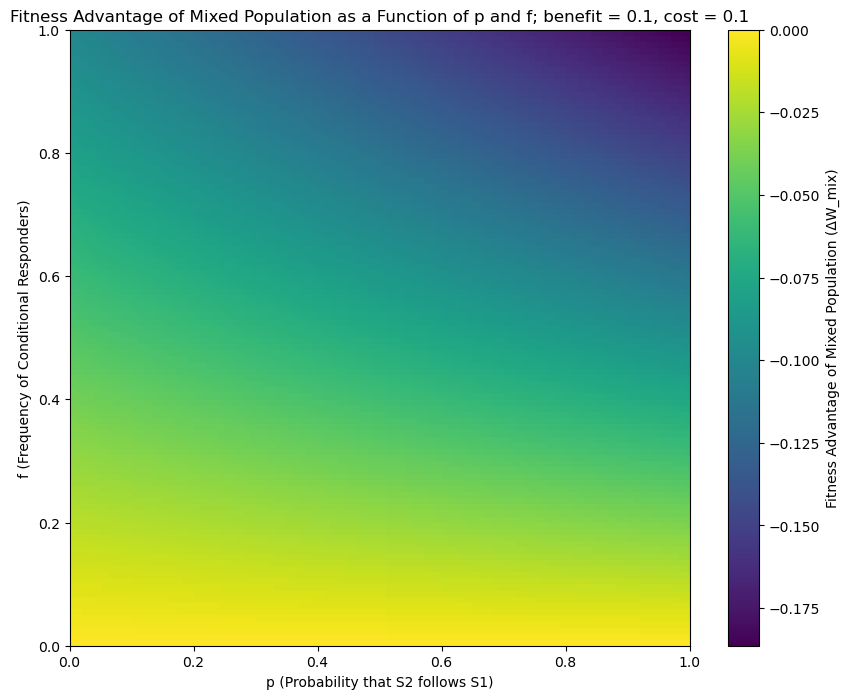

In [124]:
heatmap_data = calc_fitness_diff(F, P, eta, kappa, Ts1, alpha, delta_t)
low_cost_low_benefit = heatmap_data
# Create the 2D Heatmap
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, origin='lower', extent=[0, 1, 0, 1], aspect='auto', cmap='viridis')
plt.colorbar(label='Fitness Advantage of Mixed Population (ΔW_mix)')
plt.xlabel('p (Probability that S2 follows S1)')
plt.ylabel('f (Frequency of Conditional Responders)')
plt.title(f'Fitness Advantage of Mixed Population as a Function of p and f; benefit = {kappa}, cost = {eta}')
plt.grid(False) # Turn off grid for cleaner heatmap
plt.show()

#### High cost and high benefit:

In [135]:
# define model parameters (taken from the paper):

delta_t = 3  # Delay between S1 and S2 in hours. The model used it to simulate something passing through the digestive track
eta = 0.9   # Cost parameter
alpha = np.log(2) # Dilution/degradation rate (ln(2))
kappa = 0.9   # Benefit coefficient
Ts1 = 1

# eta, kappa and Ts1 exact values were not mentioned in the paper. I chose arbitraty values. 

0.9


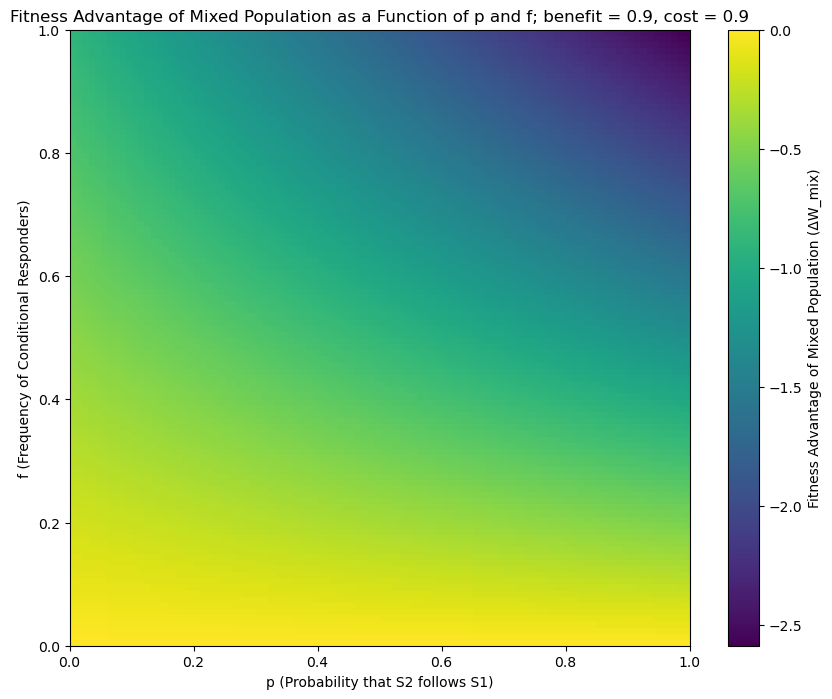

In [136]:
# run the average fitness advantage function and create heatmap:

heatmap_data = calc_fitness_diff(F, P, eta, kappa, Ts1, alpha, delta_t)
high_cost_high_benefit = heatmap_data
# Create the 2D Heatmap
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, origin='lower', extent=[0, 1, 0, 1], aspect='auto', cmap='viridis')
plt.colorbar(label='Fitness Advantage of Mixed Population (ΔW_mix)')
plt.xlabel('p (Probability that S2 follows S1)')
plt.ylabel('f (Frequency of Conditional Responders)')
plt.title(f'Fitness Advantage of Mixed Population as a Function of p and f; benefit = {kappa}, cost = {eta}')
plt.grid(False) # Turn off grid for cleaner heatmap
plt.show()

#### High cost and low benefit

In [137]:
# define model parameters (taken from the paper):

delta_t = 3  # Delay between S1 and S2 in hours. The model used it to simulate something passing through the digestive track
eta = 0.9   # Cost parameter
alpha = np.log(2) # Dilution/degradation rate (ln(2))
kappa = 0.1   # Benefit coefficient
Ts1 = 1

# eta, kappa and Ts1 exact values were not mentioned in the paper. I chose arbitraty values.

0.9


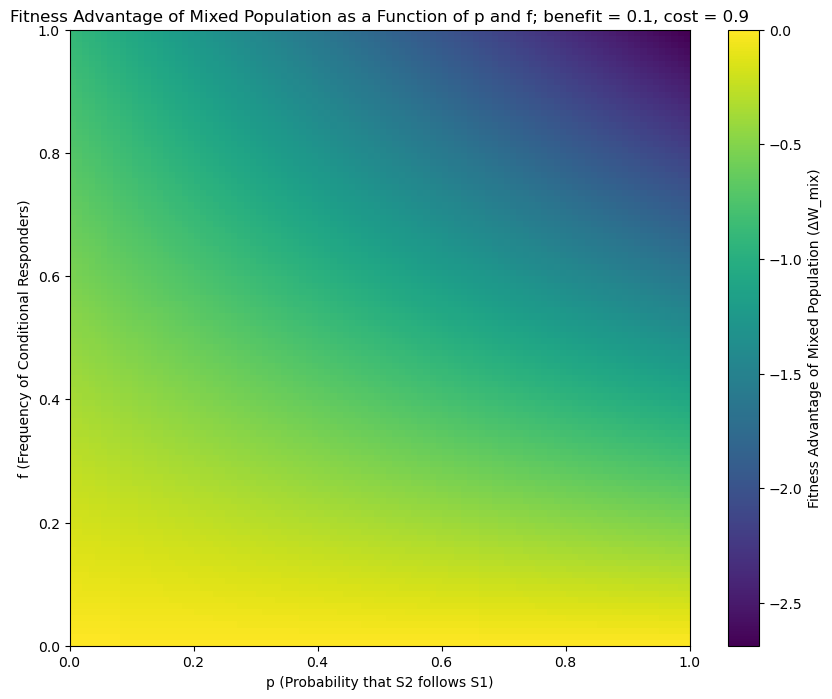

In [138]:
# run the average fitness advantage function and create heatmap:

heatmap_data = calc_fitness_diff(F, P, eta, kappa, Ts1, alpha, delta_t)
high_cost_low_benefit = heatmap_data
# Create the 2D Heatmap
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, origin='lower', extent=[0, 1, 0, 1], aspect='auto', cmap='viridis')
plt.colorbar(label='Fitness Advantage of Mixed Population (ΔW_mix)')
plt.xlabel('p (Probability that S2 follows S1)')
plt.ylabel('f (Frequency of Conditional Responders)')
plt.title(f'Fitness Advantage of Mixed Population as a Function of p and f; benefit = {kappa}, cost = {eta}')
plt.grid(False) # Turn off grid for cleaner heatmap
plt.show()

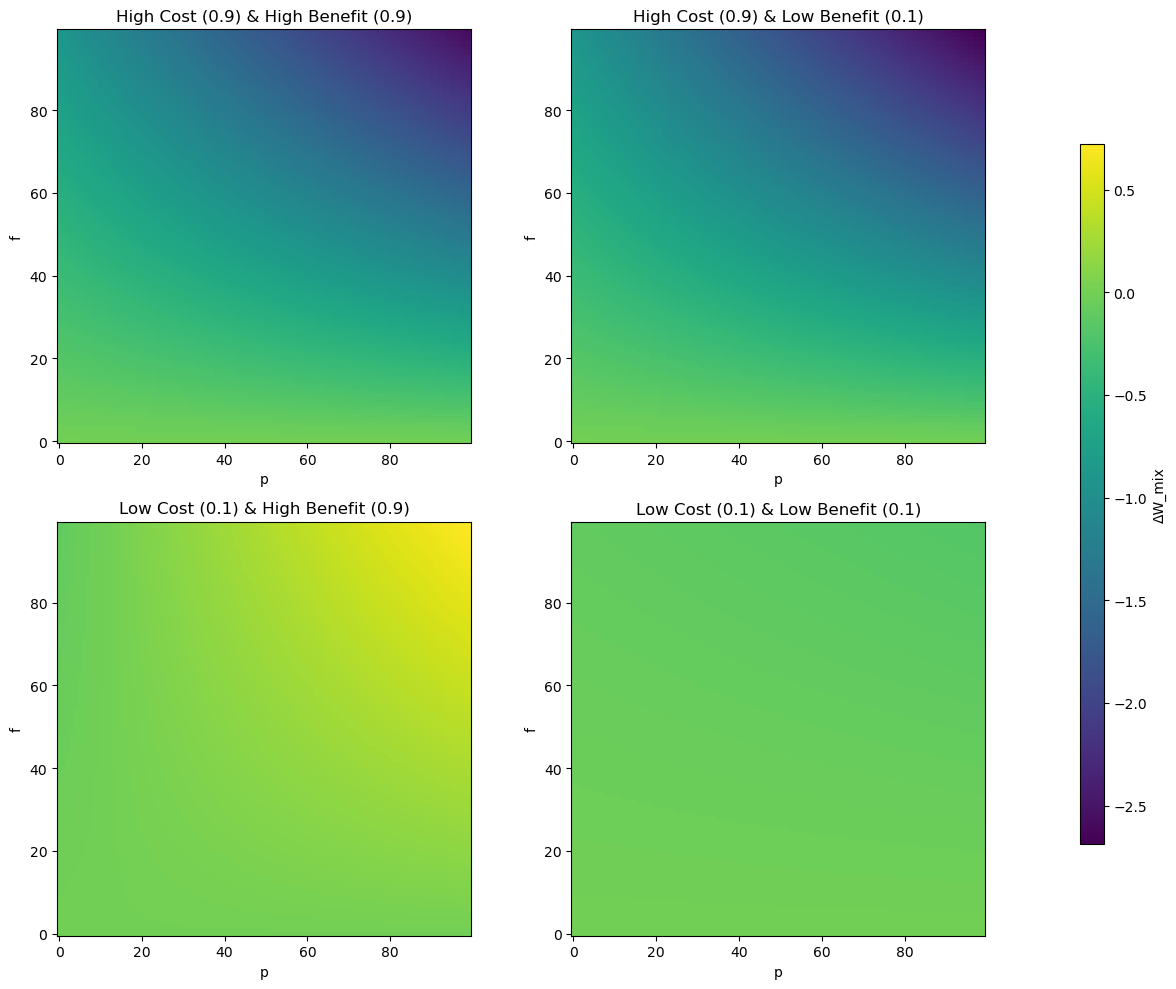

In [139]:
import matplotlib.pyplot as plt
import numpy as np

# Your four 2D numpy arrays or DataFrames (assumed to be same shape)
heatmaps = {
    'High Cost (0.9) & High Benefit (0.9)': high_cost_high_benefit,
    'High Cost (0.9) & Low Benefit (0.1)': high_cost_low_benefit,
    'Low Cost (0.1) & High Benefit (0.9)': low_cost_high_benefit,
    'Low Cost (0.1) & Low Benefit (0.1)': low_cost_low_benefit
}

# Compute global vmin and vmax across all datasets
vmin = min(hm.min() for hm in heatmaps.values())
vmax = max(hm.max() for hm in heatmaps.values())

# Create the 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten to iterate easily

# Plot each heatmap
for ax, (title, data) in zip(axes, heatmaps.items()):
    im = ax.imshow(data, origin='lower', cmap='viridis', vmin=vmin, vmax=vmax)
    ax.set_title(title)
    ax.set_xlabel('p')
    ax.set_ylabel('f')

# Adjust layout and add a single colorbar
fig.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax, label='ΔW_mix')

plt.show()


## Biological Interpretation of Conditional Response Strategies

This assignment explores the intricate balance of evolutionary strategies in microorganisms, specifically addressing the favorability of a "**Conditional Response**" (CR) strategy in relation to environmental predictability. Microorganisms, like *E. coli*, often face fluctuating environments and have evolved sophisticated regulatory mechanisms to anticipate changes.

A Conditional Response strategy, where an organism prepares for a subsequent stimulus (S2) upon encountering an initial cue (S1), is shaped by two opposing evolutionary forces:

1.  **Benefit**: When the predicted S2 stimulus indeed follows S1, cells employing the CR strategy are pre-adapted. This pre-adaptation provides a significant fitness advantage compared to "**Direct Response**" (DR) cells, which only initiate their response when S2 actually appears. This benefit stems from reduced lag times, more efficient resource utilization, or avoiding damage, leading to faster growth or better survival.

2.  **Cost**: Conversely, when S2 does *not* follow S1, CR cells incur a fitness cost. This "false positive" response means they invest energy and resources into preparing for an event that never materializes. This misallocation of resources can divert energy from essential growth or maintenance processes, potentially harming fitness compared to DR cells that remain unburdened by an unnecessary response.

Our analysis of the mixed population model, varying the **probability of S2 following S1 (`p`)** and the **frequency of CR cells (`f`)**, reveals distinct outcomes under different cost-benefit scenarios:

---

### 1. Low Cost and High Benefit Environment

In an environment where initiating a Conditional Response is energetically inexpensive (low cost, $\eta$) and offers substantial gains when S2 occurs (high benefit, $\kappa$), the CR strategy is highly favored. The population would tend towards a **higher frequency of conditional responders (`f`) across most conditions**. This is because the benefits of anticipation largely outweigh the minimal costs of false predictions. As observed in the figure (assuming it reflects this), higher environmental predictability (`p`) would lead to an even greater advantage for CR cells, driving `f` towards **fixation** (i.e., `f` approaching 1). In such stable, highly predictable environments, the conditional response strategy would likely become dominant.

---

### 2. Low Cost and Low Benefit Environment

Here, the fitness differences between CR and DR strategies are marginal, as neither the potential gains nor the potential losses are substantial. The figure (with a maximum fitness difference of only 0.15) would show a relatively flat landscape, indicating that neither strategy offers a decisive advantage. Interestingly, at very high predictability (`p=1`), a high frequency of CR cells (`f` close to 1) might even show a slight fitness disadvantage. This could arise if, for instance, the delay between S1 and S2 (`Δt`) is too long. In such a scenario, even a low cost sustained over a long, unnecessary preparatory period might accumulate, negating the minor benefit. In this type of environment, maintaining a **mixed population** (where both CR and DR strategies coexist) could be favorable, as there's no strong selective pressure pushing towards the fixation of one strategy.

---

### 3. High Cost and High Benefit Environment

This scenario presents a significant trade-off. While the potential for fitness gain from a correct prediction is high, the potential for fitness loss from a false prediction is also substantial. As seen in the figure, populations with a high `f` (many CR cells) in highly predictable environments (`p=1`) might experience a fitness disadvantage, while at `p=0` (S2 never follows S1), high `f` would clearly be detrimental. The fitness landscape here would likely show sharp gradients. In such volatile environments where both rewards and penalties are high, a **mixed population** would likely be the most advantageous, allowing the population to hedge its bets against fluctuating predictability.

---

### 4. High Cost and Low Benefit Environment

In this most challenging scenario for CR cells, the costs of preparation far outweigh the potential benefits. The figure would demonstrate that the only conditions under which a CR strategy might not be strongly selected against are when S2 *never* follows S1 (`p=0`). In all other cases, the high cost of preparation would make CR cells less fit. This environment would strongly favor the DR strategy, pushing `f` towards zero (fixation of DR).

---

### Overall Conclusion on Cost-Benefit Balance:

Our findings suggest that the **cost of exercising the Conditional Response (`η`) carries a greater weight in determining the average fitness advantage of the population compared to the benefit coefficient (`κ`)**, at least within the parameter ranges explored. High costs can quickly negate even moderate benefits, especially in less predictable environments.

---

### Maintaining a Mixed Population:

The concept of environmental constancy is often an oversimplification. In reality, environments are rarely static; factors like `p` (predictability), `η` (cost), `κ` (benefit), and `Δt` (delay) can vary over time.

* **Environmental Heterogeneity/Variability**: If the optimal strategy (CR, DR, or mixed) fluctuates due to changes in environmental predictability or resource availability, a population that can maintain **both strategical options** within its genetic diversity (i.e., a mixed `f`) would be more robust and resilient. This "**bet-hedging**" strategy allows the population to survive and thrive across different environmental regimes, rather than facing extinction if a fixed strategy becomes disadvantageous.
* **Balancing Trade-offs**: A mixed strategy can optimize fitness by balancing the advantages of pre-adaptation (CR) with the resource efficiency of direct response (DR) under uncertain conditions. This could lead to a stable polymorphism where neither strategy completely outcompetes the other.